<a href="https://colab.research.google.com/github/OH1107/aisa_edu/blob/master/ML/ML_1%EC%9D%BC%EC%B0%A8_20200818.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


## 1. 개요
- IRIS 붓꽃 분류 모형을 만든다.

### (1) 패키지 불러오기
- sklearn 패키지를 불러온다.

### (2) 데이터 불러오기
- sklearn 패키지 내장 데이터 있음


In [ ]:
from sklearn.datasets  import load_iris

iris = load_iris() # Bunch 형태의 데이터셋으로 구성되어 있음

# 독립변수로 구성된 데이터
iris_data = iris.data

# 종속변수
iris_label = iris.target

print("iris target 값 : ", iris_label[[0,50,100]])
print("iris target 명 : ", iris.target_names)

iris target 값 :  [0 1 2]
iris target 명 :  ['setosa' 'versicolor' 'virginica']


### (3) 데이터 전처리
- 상황 : Numpy 형태, 리스트 형태로 되어 있는 데이터
- 방법 : pandas 사용, 데이터 프레임 만들기
- ref : https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset

In [ ]:
import pandas as pd
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(load_iris())
print(df_iris.head(3).to_markdown())

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   target |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|---------:|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |        0 |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |        0 |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |        0 |


### (4) 데이터 시각화
- 시각화를 위한 전처리


In [ ]:
temp_data=df_iris.copy()
#print(temp_data.info())

#column명 바꾸기
temp_data.columns = ['sepal_length',
                     'sepal_width',
                     'petal_length',
                     'petal_width',
                     'species']
#temp_data.info()

#map  0->'setosa'  1->'versicolor'  2->'virginica'
replace_fct = {0:'setosa',1:'versicolor',2:'virginica'}
temp_data['species']=temp_data['species'].map(replace_fct)
print(temp_data.head(3))

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


- 수치형 데이터: 히스토그램 & 박스플롯 & 산점도

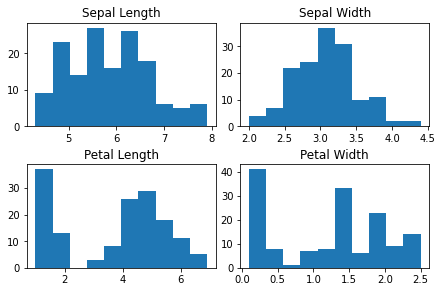

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2)
axs[0,0].hist(temp_data['sepal_length']);
axs[0,0].set_title('Sepal Length');

axs[0,1].hist(temp_data['sepal_width']);
axs[0,1].set_title('Sepal Width');

axs[1,0].hist(temp_data['petal_length']);
axs[1,0].set_title('Petal Length');

axs[1,1].hist(temp_data['petal_width']);
axs[1,1].set_title('Petal Width');

fig.tight_layout(pad=0.5);

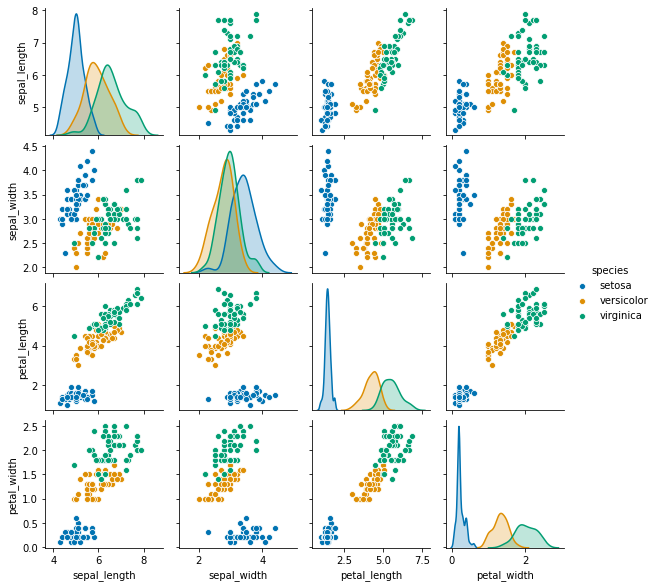

In [ ]:
import seaborn as sns
sns.pairplot(temp_data, hue="species", height = 2, palette = 'colorblind');

### (5) 데이터셋 분리
- 학습용 데이터와 테스트용 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 데이터와 테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label,
                                                    test_size = 0.2,
                                                    random_state = 1)

- arrays~
- test_size, 비율 (훈련데이터/테스트데이터)
- randeom_state는 실험의 재현성을 위한 코드

### (6) 머신러닝 모형 학습
- 머신러닝 모형을 만듭시다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 11)

# 학습수행
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

### (7) 모형 테스트
- 모형 예측

In [ ]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(x_test)
print("The accuracy of the Decision Tree is : {:.3f}".format(accuracy_score(pred,y_test)))

The accuracy of the Decision Tree is : 0.967


### (8) 모형 결과 시각화


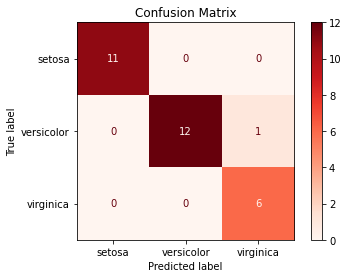

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(dt_clf, 
                             x_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');